# Low-Code AutoML with PyCaret

## Introduction

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.

In this notebook, we will explore PyCaret's capabilities across different machine learning tasks:
- Binary Classification
- Multiclass Classification
- Regression
- Clustering
- Time Series Forecasting

Each section demonstrates loading data, setting up experiments, training models, evaluation, visualization, model persistence, and deployment options.

> ### Note:
> For PyCaret to work without issues make sure you are running Python version 3.10.x

In [1]:
!python --version

Python 3.10.18


In [ ]:
!uv pip install pycaret

In [2]:
import pycaret
pycaret.__version__

'3.3.2'

## Binary Classification

In this section, we demonstrate binary classification using PyCaret. We'll use the diabetes dataset to predict whether a patient has diabetes based on diagnostic measurements. The workflow includes data loading, experiment setup, model comparison, evaluation, visualization, and model deployment.

### Data Loading and Exploration

In [3]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('diabetes')

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

In [5]:
data['Class variable'].value_counts()

Class variable
0    500
1    268
Name: count, dtype: int64

### Experiment Setup

In [6]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


### Model Comparison

In [7]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7689,0.8047,0.5602,0.7208,0.6279,0.4641,0.4736,0.4780
ridge,Ridge Classifier,0.7670,0.8060,0.5497,0.7235,0.6221,0.4581,0.4690,0.0060
lda,Linear Discriminant Analysis,0.7670,0.8055,0.5550,0.7202,0.6243,0.4594,0.4695,0.0060
rf,Random Forest Classifier,0.7466,0.7920,0.5284,0.6795,0.5908,0.4117,0.4210,0.0370
nb,Naive Bayes,0.7427,0.7955,0.5702,0.6543,0.6043,0.4156,0.4215,0.0040
gbc,Gradient Boosting Classifier,0.7373,0.7909,0.5550,0.6445,0.5931,0.4013,0.4059,0.0230
ada,Ada Boost Classifier,0.7372,0.7799,0.5275,0.6585,0.5796,0.3926,0.4017,0.0150
qda,Quadratic Discriminant Analysis,0.7282,0.7894,0.5281,0.6558,0.5736,0.3785,0.3910,0.0140
et,Extra Trees Classifier,0.7243,0.7793,0.4857,0.6419,0.5487,0.3565,0.3663,0.0290
lightgbm,Light Gradient Boosting Machine,0.7133,0.7645,0.5398,0.6036,0.5650,0.3534,0.3580,0.3230


In [8]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Evaluation and Prediction

In [9]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7576,0.8568,0.5309,0.7049,0.6056,0.4356,0.4447


In [10]:
# show predictions df
holdout_pred

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
552,6,114,88,0,0,27.799999,0.247,66,0,0,0.8037
438,1,97,70,15,0,18.200001,0.147,21,0,0,0.9648
149,2,90,70,17,0,27.299999,0.085,22,0,0,0.9394
373,2,105,58,40,94,34.900002,0.225,25,0,0,0.7999
36,11,138,76,0,0,33.200001,0.420,35,0,1,0.6393
...,...,...,...,...,...,...,...,...,...,...,...
85,2,110,74,29,125,32.400002,0.698,27,0,0,0.8002
7,10,115,0,0,0,35.299999,0.134,29,0,1,0.6230
298,14,100,78,25,184,36.599998,0.412,46,1,0,0.5984
341,1,95,74,21,73,25.900000,0.673,36,0,0,0.9244


In [11]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

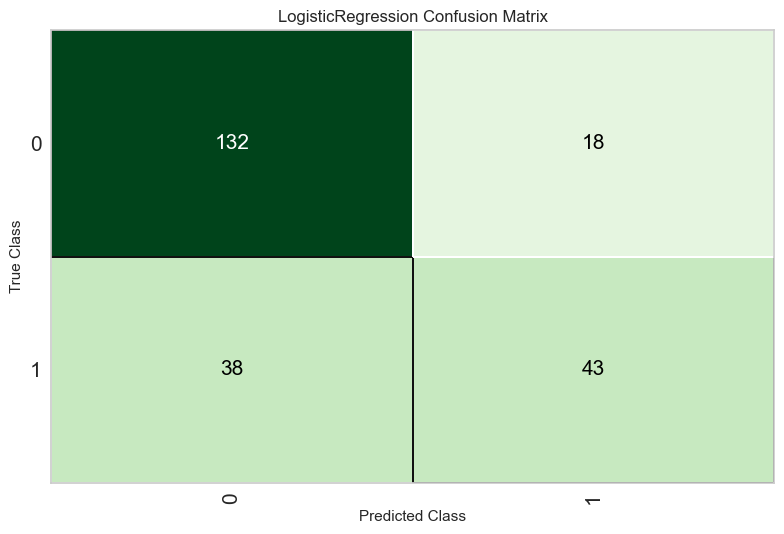

In [12]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

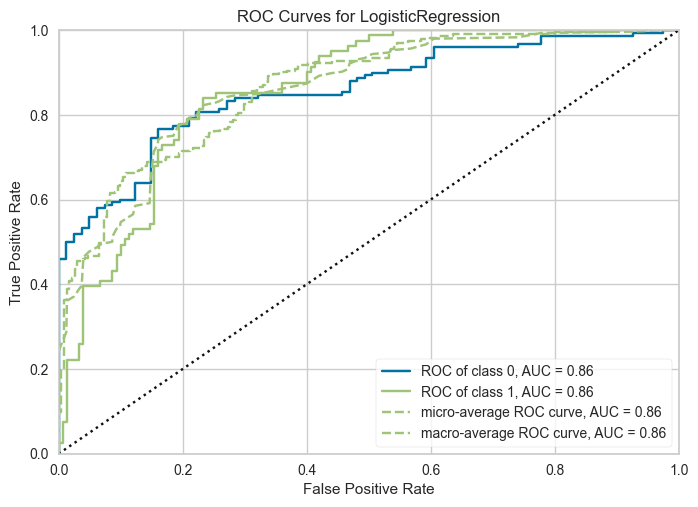

In [13]:
# plot AUC
plot_model(best, plot = 'auc')

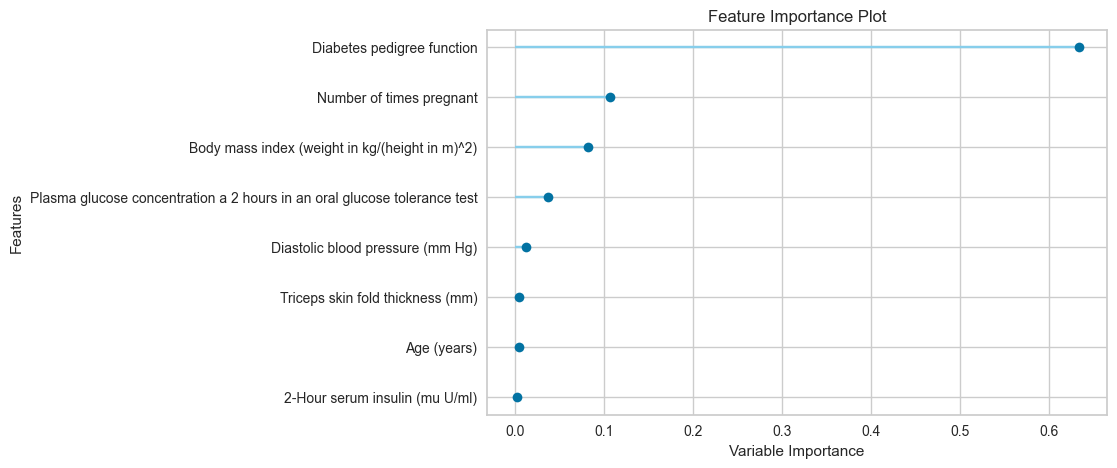

In [15]:
# plot feature importance
plot_model(best, plot = 'feature')

### Model Persistence

### Saving and Loading a model

In [14]:
# save pipeline
save_model(best, 'diabetes_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Number of times pregnant',
                                              'Plasma glucose concentration a 2 '
                                              'hours in an oral glucose '
                                              'tolerance test',
                                              'Diastolic blood pressure (mm Hg)',
                                              'Triceps skin fold thickness (mm)',
                                              '2-Hour serum insulin (mu U/ml)',
                                              'Body mass index (weight in '
                                              'kg/(height in m)^2)',
                                              'Diabetes pedigre...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=CleanC

In [15]:
loaded_model_pipeline = load_model('diabetes_model')
loaded_model_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/48/j6k669vx63qd_68k2_502cl40000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Number of times pregnant',
                                             'Plasma glucose concentration a 2 '
                                             'hours in an oral glucose '
                                             'tolerance test',
                                             'Diastolic blood pressure (mm Hg)',
                                             'Triceps skin fold thickness (mm)',
                                             '2-Hour serum insulin (mu U/ml)',
                                             'Body...
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=1000,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=123,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [16]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8148,0.8293,0.6316,0.8000,0.7059,0.5735,0.5820
1,0.6852,0.7549,0.4737,0.5625,0.5143,0.2839,0.2862
2,0.7222,0.7962,0.5263,0.6250,0.5714,0.3682,0.3711
3,0.6667,0.6165,0.4211,0.5333,0.4706,0.2322,0.2357
4,0.8148,0.8744,0.6316,0.8000,0.7059,0.5735,0.5820
5,0.6296,0.6271,0.4737,0.4737,0.4737,0.1880,0.1880
6,0.6111,0.6248,0.4737,0.4500,0.4615,0.1575,0.1576
7,0.7736,0.7937,0.4444,0.8000,0.5714,0.4342,0.4688
8,0.6604,0.6944,0.5556,0.5000,0.5263,0.2628,0.2636


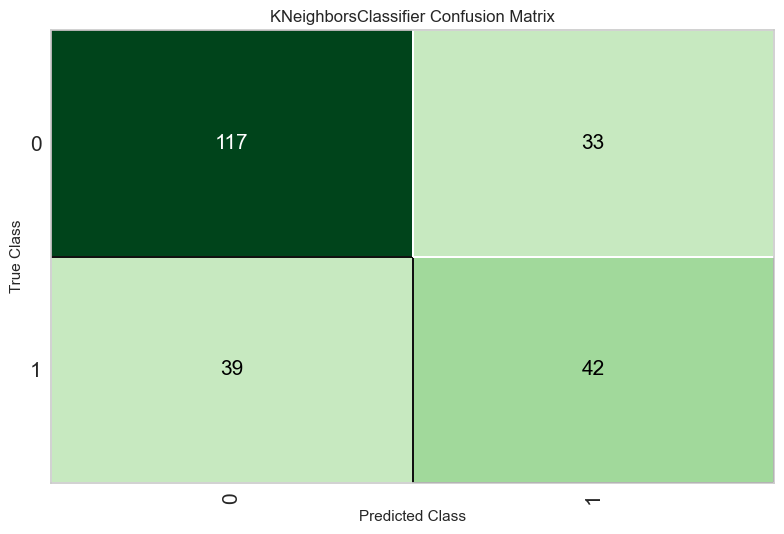

In [17]:
plot_model(knn, plot = 'confusion_matrix')

### Model Deployment

### Deploying

In [21]:
!uv pip install gradio

Using Python 3.10.18 environment at: /Users/tarekatwan/Repos/MyWork/Teach/repos/adv_ml_ds/dev2
Resolved 56 packages in 2.02s                                        
⠙ Preparing packages... (0/15)                                                  
⠙ Preparing packages... (0/15)-------------     0 B/45.93 KiB           
⠙ Preparing packages... (0/15)------------- 14.89 KiB/45.93 KiB         
⠙ Preparing packages... (0/15)------------- 14.89 KiB/45.93 KiB         
typer                ------------------------------ 14.89 KiB/45.93 KiB
⠙ Preparing packages... (0/15)-------------     0 B/105.59 KiB          
typer                ------------------------------ 30.89 KiB/45.93 KiB
⠙ Preparing packages... (0/15)-------------     0 B/105.59 KiB          
typer                ------------------------------ 45.93 KiB/45.93 KiB
⠙ Preparing packages... (0/15)-------------     0 B/105.59 KiB          
⠙ Preparing packages... (0/15)-------------     0 B/105.59 KiB          
⠙ Preparing packages... (0/

In [22]:
import gradio
gradio.__version__

'5.49.1'

In [23]:
create_app(knn)


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


In [24]:
create_api(knn, 'knn_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python knn_api.py


In [25]:
create_docker(knn)

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            


## Multiclass Classification

This section covers multiclass classification using the Iris dataset. We'll classify iris flowers into three species based on sepal and petal measurements. The process is similar to binary classification but adapted for multiple classes.

In [ ]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('iris')

In [ ]:
data['species'].value_counts()

In [ ]:
s = setup(data, target = 'species', session_id = 123)

In [ ]:
# compare baseline models
best = compare_models(sort='AUC')

In [ ]:
# predict on test set
holdout_pred = predict_model(best)
holdout_pred.head()

In [ ]:
plot_model(best, plot = 'confusion_matrix')

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# save pipeline
save_model(best, 'my_iris_prediction')

In [ ]:
loaded_model_pipeline = load_model('my_iris_prediction')
loaded_model_pipeline

## Regression

In this section, we demonstrate regression using PyCaret with the insurance dataset. We'll predict insurance charges based on various features like age, BMI, and smoking status. Regression tasks predict continuous numerical values.

In [26]:
from pycaret.regression import *

data = get_data('insurance')
s = setup(data, target = 'charges', session_id = 123)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [27]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [28]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.0200
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.0390
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.4480
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.0280
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.0110
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0120
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0110
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0230
ridge,Ridge Regression,4317.6984,38396435.9578,6177.2329,0.7306,0.5891,0.4459,0.0120
lasso,Lasso Regression,4303.7697,38386797.6709,6176.4824,0.7306,0.5952,0.4434,0.0130


In [31]:
# best = create_model('catboost')

In [32]:
# predict on test set
holdout_pred = predict_model(best)
# show predictions df
holdout_pred.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10681.513104
319,32,male,37.334999,1,no,northeast,4667.607422,8043.453463
314,27,female,31.400000,0,yes,southwest,34838.871094,36153.097686
150,35,male,24.129999,1,no,northwest,5125.215820,7435.516853
336,60,male,25.740000,0,no,southeast,12142.578125,14676.544334


In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

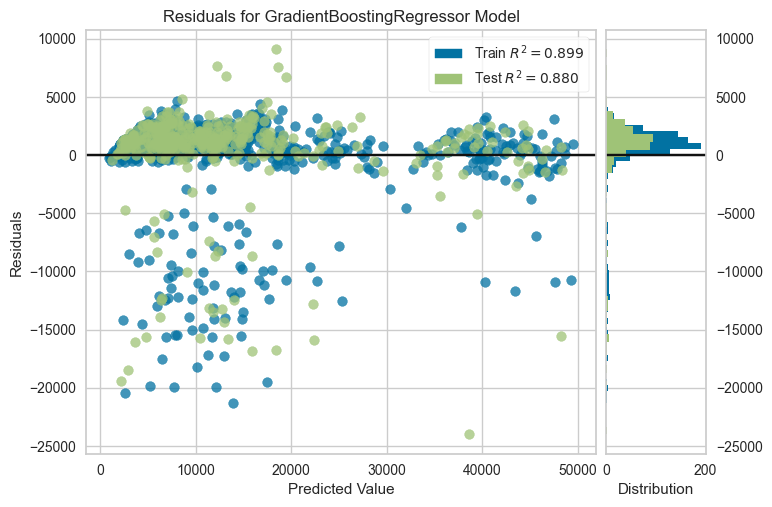

In [35]:
plot_model(best, plot = 'residuals')

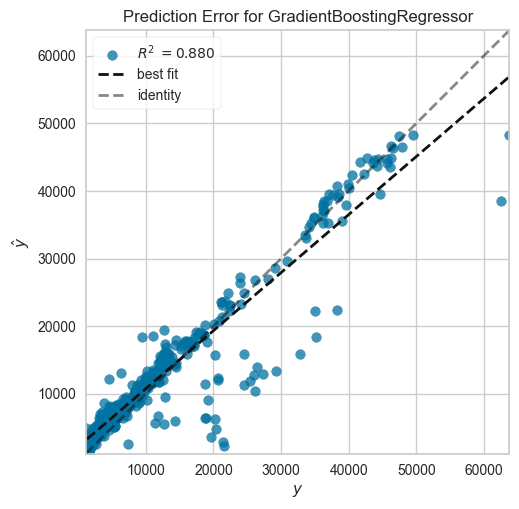

In [36]:
# plot error
plot_model(best, plot = 'error')

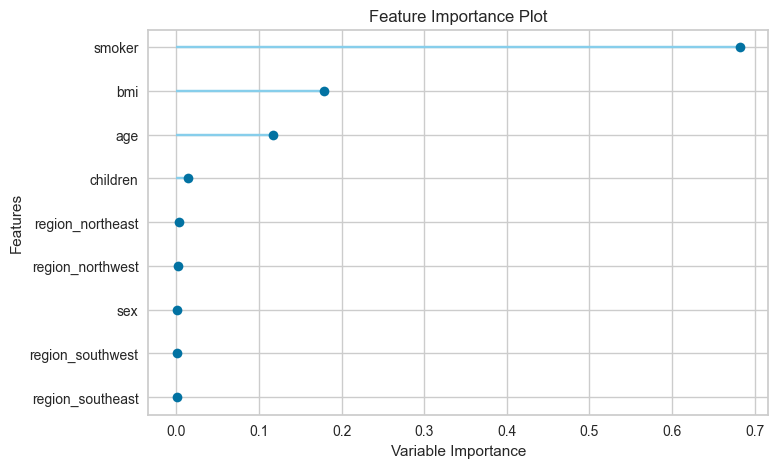

In [37]:
# plot feature importance
plot_model(best, plot = 'feature')

In [38]:
# save pipeline
save_model(best, 'regression_model')
# load pipeline
loaded_model_pipeline = load_model('regression_model')
loaded_model_pipeline

Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/48/j6k669vx63qd_68k2_502cl40000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Trans...
                                           criterion='friedman_mse', init=None,
                                           learning_rate=0.1,
                                           loss='squared_error', max_depth=3,
                                           max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100,
                                           n_iter_no_change=None,
                                           random_state=123, subsample=1.0,
                                           tol=0.0001, validation_fraction=0.1,
                                           verbose=0, warm_start=False))],
         verbose=False)

In [39]:
create_app(loaded_model_pipeline)

* Running on local URL:  http://127.0.0.1:7861
* To create a public link, set `share=True` in `launch()`.


## Clustering

This section introduces unsupervised learning with clustering using the jewellery dataset. We'll explore K-means clustering to group customers based on their spending patterns and evaluate the clustering results with various metrics and visualizations.

In [ ]:
from pycaret.clustering import *

data = get_data('jewellery')

In [ ]:
s = setup(data, session_id = 123)

In [ ]:
models()

In [ ]:
# train kmeans model
kmeans = create_model('kmeans')

In [ ]:
dbscan = create_model('birch')

In [ ]:
kmeans_cluster = assign_model(kmeans)

In [ ]:
kmeans_cluster

In [ ]:
kmeans_cluster['Cluster'].value_counts()

In [ ]:
plot_model(kmeans, plot = 'cluster')

In [ ]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

In [ ]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

In [ ]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

In [ ]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')


In [ ]:
plot_model(kmeans_pipeline,  plot = 'cluster')

## Student Activity

This is a hands-on activity for students to apply what they've learned. You'll work with a credit risk dataset to build and evaluate a classification model, then test it on unseen data to assess performance.

* Load the credit_data_train.csv 
* Train a model to predict `credit_risk`
* Once model is trained, load the `test_set.csv` 
* Remove the `credit_risk` in that dataset. This reflects actuals so you can compare how good the model did
* Predict using the test_set to get the estimated credit_risk from the model and compare agaist the actuals

In [ ]:
import pandas as pd

In [ ]:
df = # YOUR CODE 
df.head()

In [ ]:
# Check shape of the set

In [ ]:
# Configure your model 


In [ ]:
# Train a lightgbm model

In [ ]:
# Check the transformation made on the input data set

In [ ]:
# Plot the confusion matrix 

In [ ]:
# Read the test set 

In [ ]:
# Predict using the model and compare results

## Time Series

This section covers time series forecasting using PyCaret with airline passenger data. We'll forecast future passenger numbers using various time series models. Time series analysis deals with data points collected over time intervals.

In [40]:
# load sample dataset
from pycaret.datasets import get_data
data = get_data('airline')


Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
Freq: M, Name: Number of airline passengers, dtype: float64

<Axes: xlabel='Period'>

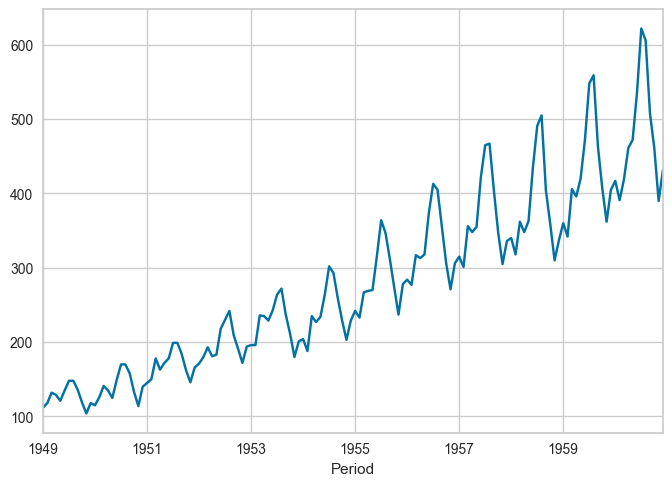

In [41]:
data.plot()

In [42]:
from pycaret.time_series import *
s = setup(data, fh = 3, fold = 5, session_id = 123)


,Description,Value
0,session_id,123
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [48]:
?compare_models

Signature:
compare_models(
    include: Optional[List[Union[str, Any]]] = None,
    exclude: Optional[List[str]] = None,
    fold: Union[int, Any, NoneType] = None,
    round: int = 4,
    cross_validation: bool = True,
    sort: str = 'MASE',
    n_select: int = 1,
    budget_time: Optional[float] = None,
    turbo: bool = True,
    errors: str = 'ignore',
    fit_kwargs: Optional[dict] = None,
    engine: Optional[Dict[str, str]] = None,
    verbose: bool = True,
    parallel: Optional[pycaret.internal.parallel.parallel_backend.ParallelBackend] = None,
)
Docstring:
This function trains and evaluates performance of all estimators available in the
model library using cross validation. The output of this function is a score grid
with average cross validated scores. Metrics evaluated during CV can be accessed
using the ``get_metrics`` function. Custom metrics can be added or removed using
``add_metric`` and ``remove_metric`` function.


Example
--------
>>> from pycaret.datasets import g

In [49]:

best = compare_models(n_select=3)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
stlf,STLF,0.4240,0.4429,12.8002,15.1933,0.0266,0.0268,0.4296,0.2560
ets,ETS,0.5519,0.5801,16.6150,19.8377,0.0354,0.0357,-0.0740,0.0300
exp_smooth,Exponential Smoothing,0.5672,0.5931,17.0619,20.2706,0.0363,0.0366,-0.0935,0.0780
arima,ARIMA,0.6480,0.6501,19.5728,22.3027,0.0412,0.0420,-0.0796,0.0240
auto_arima,Auto ARIMA,0.6529,0.6303,19.7484,21.6322,0.0415,0.0421,-0.0567,5.9440
theta,Theta Forecaster,0.8458,0.8223,25.7024,28.3332,0.0524,0.0541,-0.7710,0.3120
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.9002,0.8900,27.2568,30.5782,0.0550,0.0572,-0.0309,0.0220
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,0.9381,0.8830,28.5678,30.5007,0.0555,0.0575,0.0908,0.0280
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.9469,0.9297,28.6337,31.9163,0.0581,0.0605,-0.1620,0.0900
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.9469,0.9297,28.6340,31.9164,0.0581,0.0605,-0.1620,0.0240


In [52]:
best[1]

AutoETS(seasonal='mul', sp=12, trend='add')

In [45]:

plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 24})

In [46]:

plot_model(best, plot = 'diagnostics')

In [47]:

plot_model(best, plot = 'insample')

In [ ]:

final_best = finalize_model(best)
predict_model(best, fh = 24)

In [ ]:
final_best